In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\GitHub\Machine-Learning\Datasets\01-Petrol_consumption.csv")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [76]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [77]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Text(0, 0.5, 'Petrol Tax')

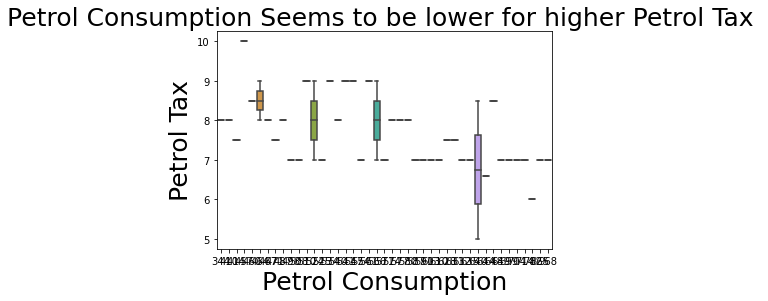

In [78]:
sns.boxplot(x=df['Petrol_Consumption'],y=df['Petrol_tax'])
plt.title("Petrol Consumption Seems to be lower for higher Petrol Tax ", fontsize=25)
plt.xlabel("Petrol Consumption",fontsize=25)
plt.ylabel("Petrol Tax",fontsize=25)

Text(0, 0.5, 'Miles of Paved highways')

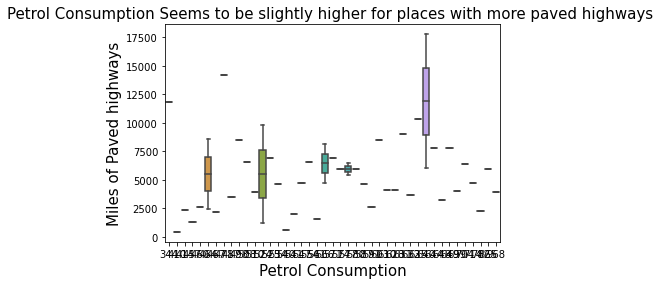

In [79]:
sns.boxplot(x=df['Petrol_Consumption'],y=df['Paved_Highways'])
plt.title("Petrol Consumption Seems to be slightly higher for places with more paved highways ", fontsize=15)
plt.xlabel("Petrol Consumption",fontsize=15)
plt.ylabel("Miles of Paved highways",fontsize=15)

Text(0, 0.5, '% of population with drivers license')

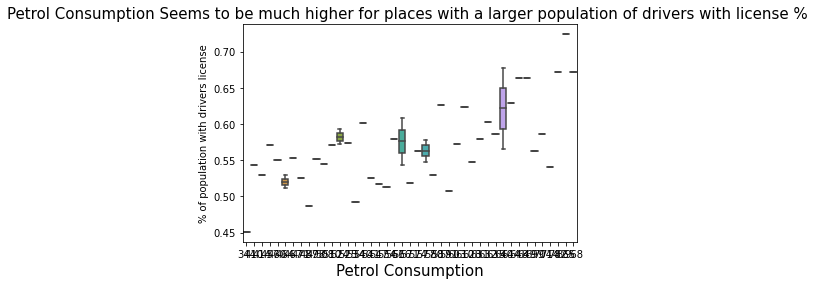

In [80]:
sns.boxplot(x=df['Petrol_Consumption'],y=df['Population_Driver_licence(%)'])
plt.title("Petrol Consumption Seems to be much higher for places with a larger population of drivers with license % ", fontsize=15)
plt.xlabel("Petrol Consumption",fontsize=15)
plt.ylabel("% of population with drivers license",fontsize=10)

In [81]:
#No categorical variables in the data set
print(df.isna().sum())
#No missing values in the data set

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64


In [82]:
# removing outliers
for col in df:
    Q1 =  df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print (col, "=" , df[(df[col] < Q1-1.5*IQR ) | (df[col] > Q3+1.5*IQR)][col])

Petrol_tax = 5     10.0
36     5.0
Name: Petrol_tax, dtype: float64
Average_income = Series([], Name: Average_income, dtype: int64)
Paved_Highways = 11    14186
36    17782
Name: Paved_Highways, dtype: int64
Population_Driver_licence(%) = 18    0.724
Name: Population_Driver_licence(%), dtype: float64
Petrol_Consumption = 18    865
39    968
Name: Petrol_Consumption, dtype: int64


In [83]:
df.drop([39,], inplace = True)
df.drop([36,], inplace = True)
df.drop([18,], inplace = True)
df.drop([11,], inplace = True)
df.drop([5,], inplace = True)

df_final = pd.get_dummies(df,drop_first=True)


In [84]:
df_final.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [85]:
from sklearn.model_selection import train_test_split
X = df_final.drop('Petrol_Consumption',axis=1)
y = df_final['Petrol_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [86]:
X = df.iloc[:,:-1]
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [87]:
y = df.iloc[::,-1].values

In [88]:
y = y.reshape(-1,1)

In [89]:
# feature scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[0:4]

array([[ 1.57132228, -1.11707987, -1.17957594, -0.81031071],
       [ 1.57132228, -0.17202718, -1.44439965,  0.12924061],
       [ 1.57132228, -0.58378718, -1.32183661,  0.28916424],
       [-0.25744508,  1.23920314, -1.04278683, -0.7303489 ]])

In [90]:
# splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((34, 4), (9, 4), (34, 1), (9, 1))

In [91]:
# building model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
ypredict = model.predict(X_test)

In [92]:
# checking accuracy
from sklearn.metrics import r2_score
r2_score(y_test,ypredict)

0.45144582447241977